<a href="https://colab.research.google.com/github/SergSpike/ConvStone/blob/main/ConvStone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1ITL_AH50kxvGXhNzsYpR4yKRaXCl35mQ/view?usp=share_link

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ITL_AH50kxvGXhNzsYpR4yKRaXCl35mQ
From (redirected): https://drive.google.com/uc?id=1ITL_AH50kxvGXhNzsYpR4yKRaXCl35mQ&confirm=t&uuid=500ff649-43c7-40c9-a2df-06346b44ace8
To: /content/Kidney_Stone_Dataset_1799.zip
100% 715M/715M [00:04<00:00, 174MB/s]


In [ ]:
!unzip "/content/Kidney_Stone_Dataset_1799.zip" > /dev/null 

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [ ]:
path = os.listdir('/content/Kidney_Stone_Dataset_1799/Train/')
classes = {'Kidney_stone':0, 'Normal':1}

In [ ]:

import cv2
X = []
Y = []
for cls in classes:
    pth1 = '/content/Kidney_Stone_Dataset_1799/Train/'+cls
    for j in os.listdir(pth1):
        img = cv2.imread(pth1+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

for cls in classes:
    pth2 = '/content/Kidney_Stone_Dataset_1799/Test/'+cls
    for j in os.listdir(pth2):
        img = cv2.imread(pth2+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])      

In [ ]:
X = np.array(X)
Y = np.array(Y)

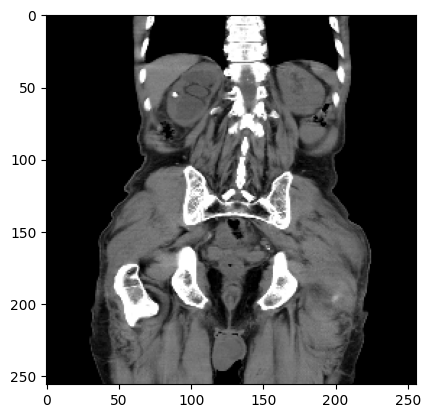

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X[0].shape

(256, 256, 3)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,test_size=.20) #random_state=10

In [ ]:
xtrain.shape, xtest.shape

((1439, 256, 256, 3), (360, 256, 256, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(xtrain)

In [ ]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D,MaxPooling2D
import tensorflow as tf

In [ ]:
model = Sequential()


model.add(Conv2D(64, 3, activation='relu',input_shape = (256,256,3))) #3 Conv1D
model.add(MaxPooling2D(pool_size=2)) #2
model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Conv2D(256, 3, activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(512, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Conv2D(1024, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
# model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(1024, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.2)) 

model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization())

model.add(Dropout(0.3)) 

model.add(Dense(2, activation='softmax')) 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_40 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                      

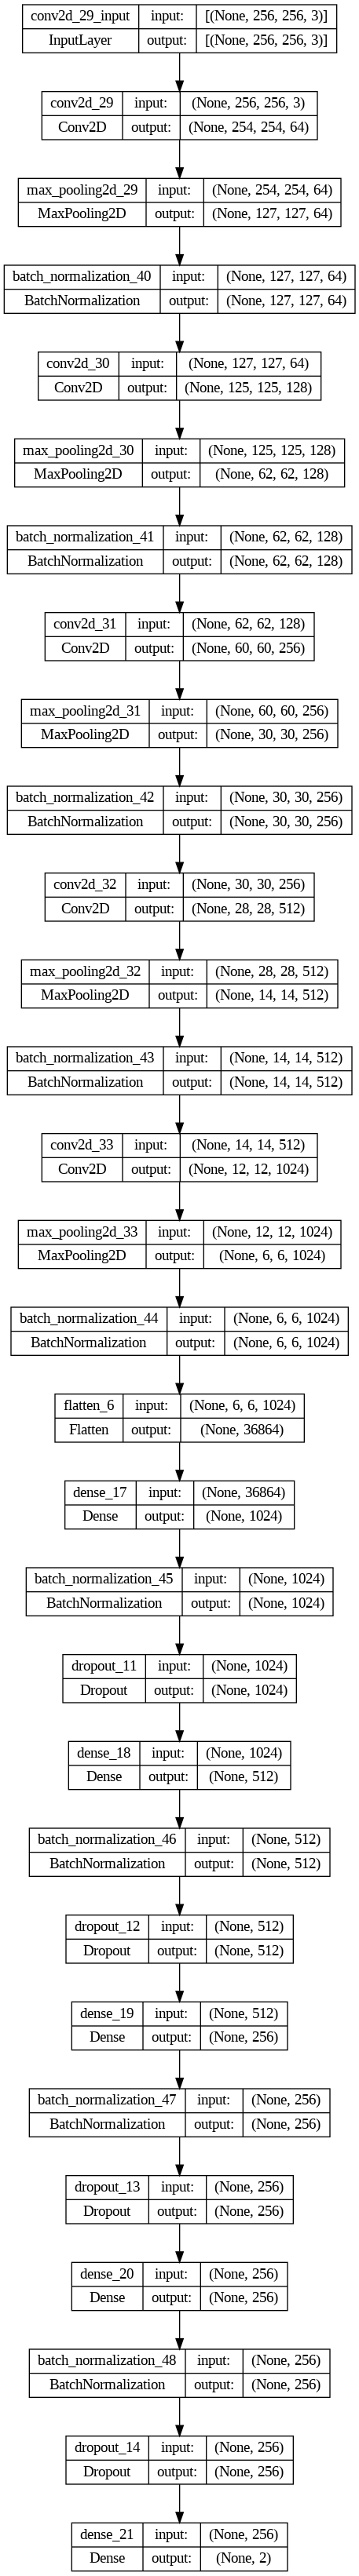

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='CNN Architecture.png')

In [ ]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [ ]:
r=model.fit(xtrain,
          ytrain,
          epochs=60,
          batch_size=32,
          verbose=1,
          validation_data=(xtest,ytest),
          shuffle=False
          )

Epoch 1/60
45/45 [==============================] - 15s 195ms/step - loss: 0.9444 - accuracy: 0.5754 - val_loss: 64.2374 - val_accuracy: 0.5833
Epoch 2/60
45/45 [==============================] - 9s 192ms/step - loss: 0.6605 - accuracy: 0.6915 - val_loss: 15.7341 - val_accuracy: 0.5833
Epoch 3/60
45/45 [==============================] - 9s 195ms/step - loss: 0.4785 - accuracy: 0.7832 - val_loss: 6.0242 - val_accuracy: 0.5889
Epoch 4/60
45/45 [==============================] - 9s 193ms/step - loss: 0.2851 - accuracy: 0.8812 - val_loss: 1.2506 - val_accuracy: 0.5417
Epoch 5/60
45/45 [==============================] - 9s 192ms/step - loss: 0.1965 - accuracy: 0.9229 - val_loss: 0.6187 - val_accuracy: 0.7778
Epoch 6/60
45/45 [==============================] - 9s 190ms/step - loss: 0.1456 - accuracy: 0.9444 - val_loss: 0.3607 - val_accuracy: 0.8917
Epoch 7/60
45/45 [==============================] - 8s 186ms/step - loss: 0.1020 - accuracy: 0.9527 - val_loss: 1.1952 - val_accuracy: 0.7889
Epo

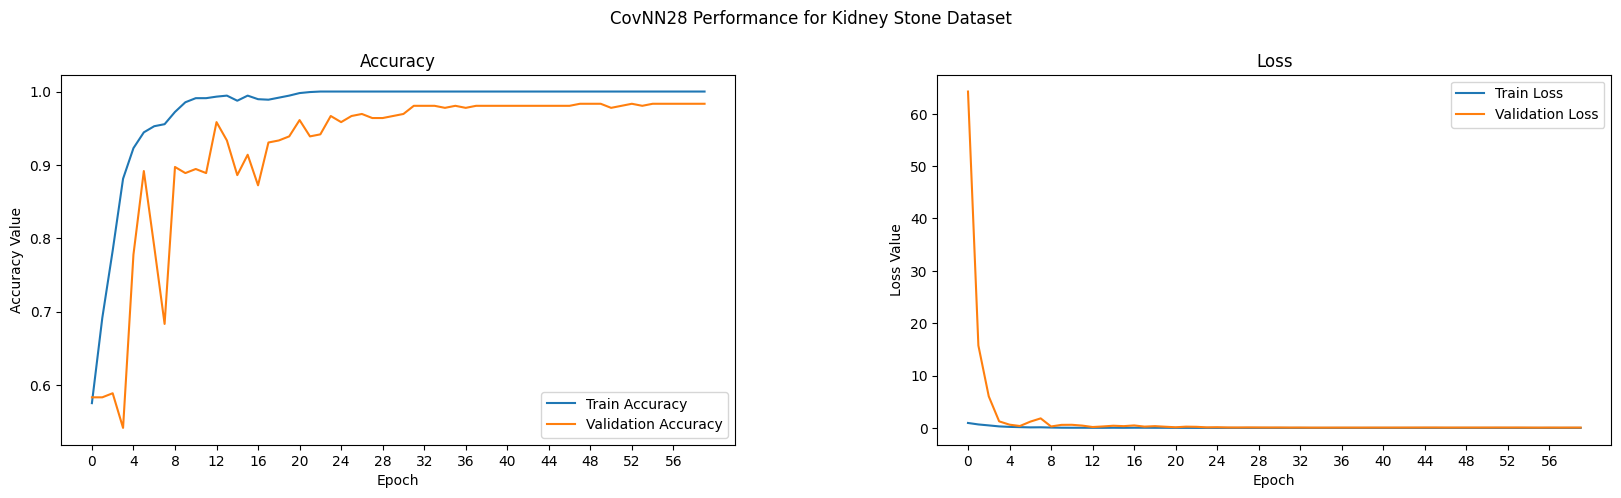

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
t = f.suptitle('CovNN28 Performance for Kidney Stone Dataset', fontsize=12 )
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,60))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 60, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 60, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


plt.savefig('CNN Performance imagedata.png')

In [ ]:
pred=model.predict(xtest)
Y_pred = np.argmax(pred, 1)

12/12 [==============================] - 1s 49ms/step


In [ ]:
Y_pred.shape

(360,)

In [ ]:
ytest.shape

(360,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(ytest, Y_pred))

Confusion Matrix
[[144   6]
 [  0 210]]


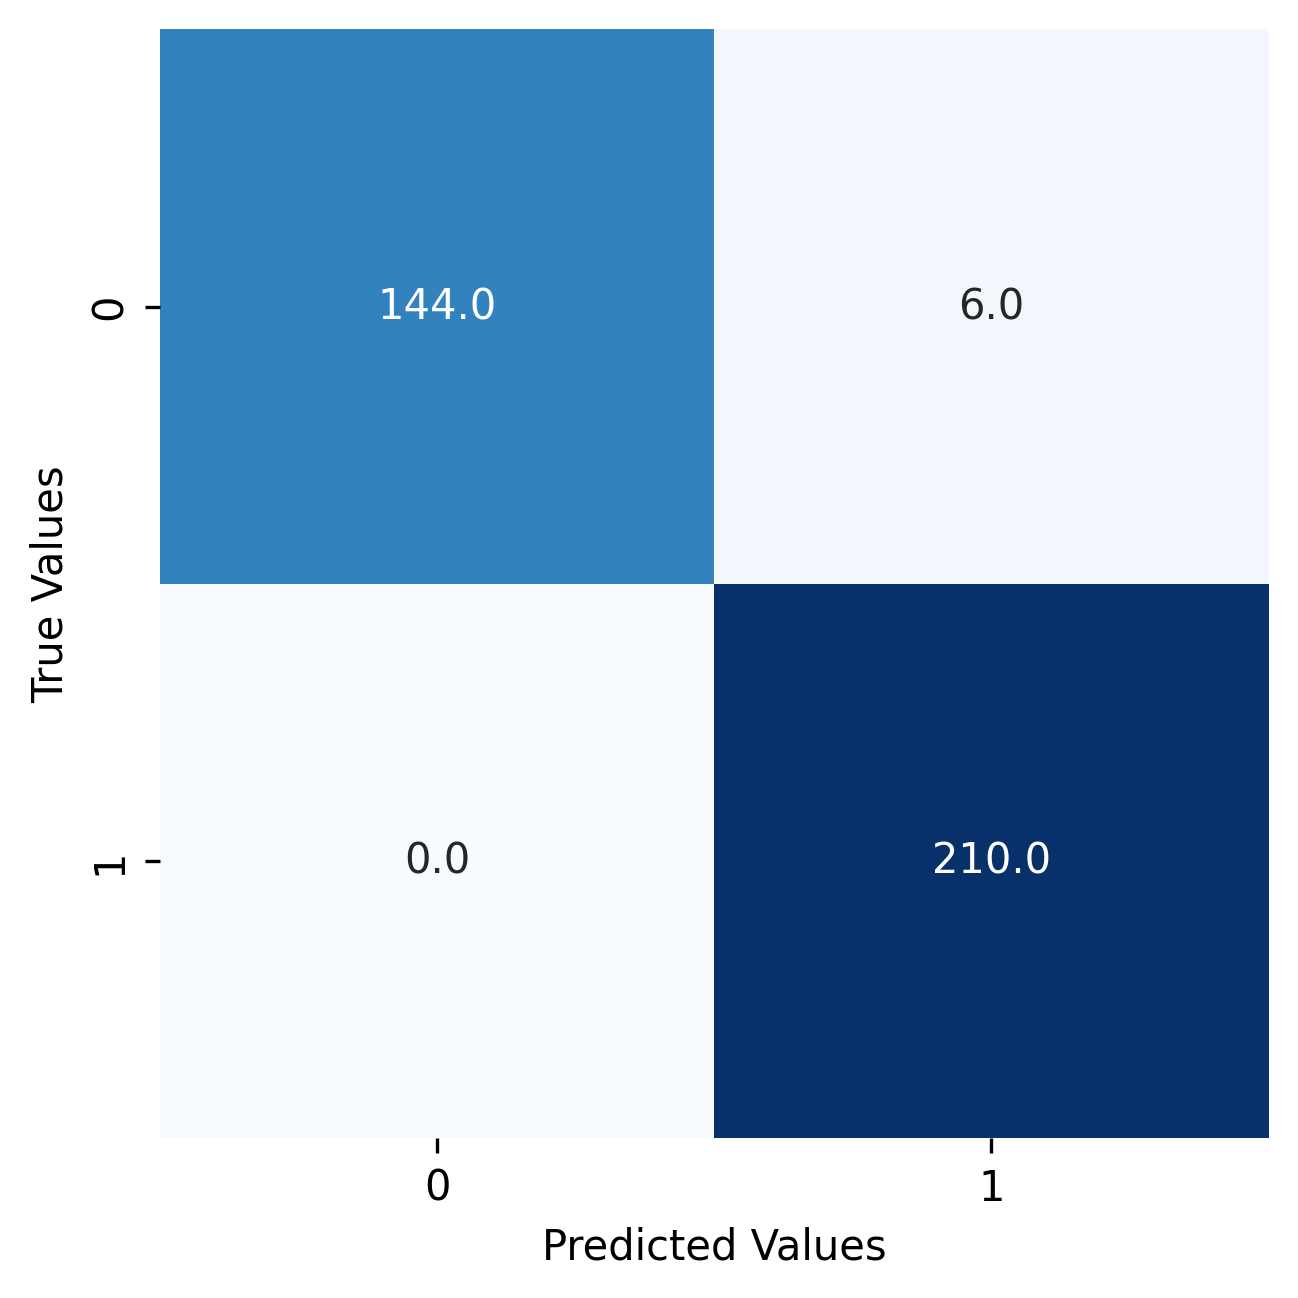

In [ ]:
import seaborn as sns
cm=confusion_matrix(ytest, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['Kidney_stone', 'Normal']
print(classification_report(ytest, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

Kidney_stone       1.00      0.96      0.98       150
      Normal       0.97      1.00      0.99       210

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
print(ytrain)

[1 1 0 ... 0 1 1]


[Text(0, 0.5, 'Kidney_stone'), Text(0, 1.5, 'Normal')]

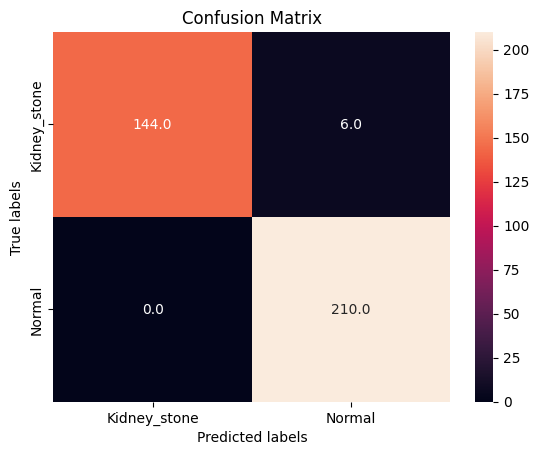

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Kidney_stone', 'Normal']); ax.yaxis.set_ticklabels(['Kidney_stone', 'Normal'])



Confusion Matrix :
[[144   6]
 [  0 210]]
Accuracy Score : 0.9833333333333333
Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       150
           1       0.97      1.00      0.99       210

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



(<Figure size 1920x1440 with 2 Axes>, <Axes: >)

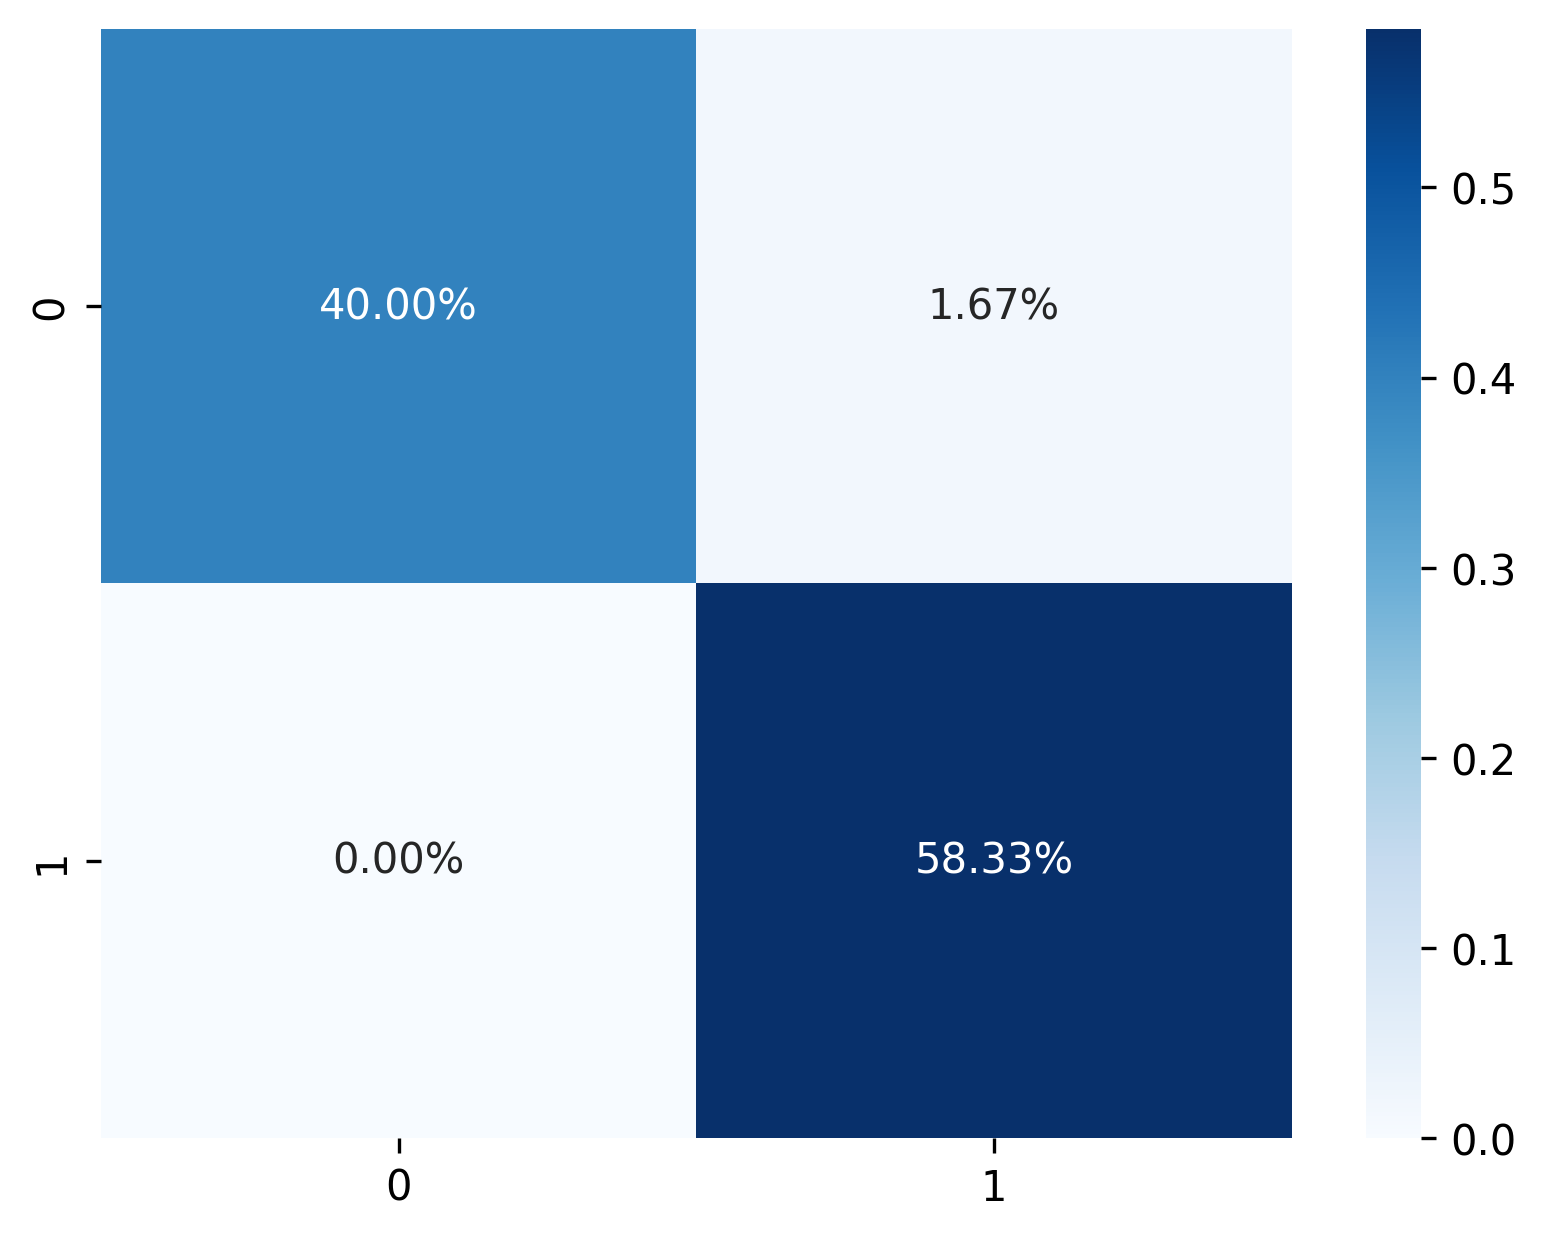

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(ytest,Y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(ytest,Y_pred)) 
print('Report : ')
print(classification_report(ytest,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, Y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.98

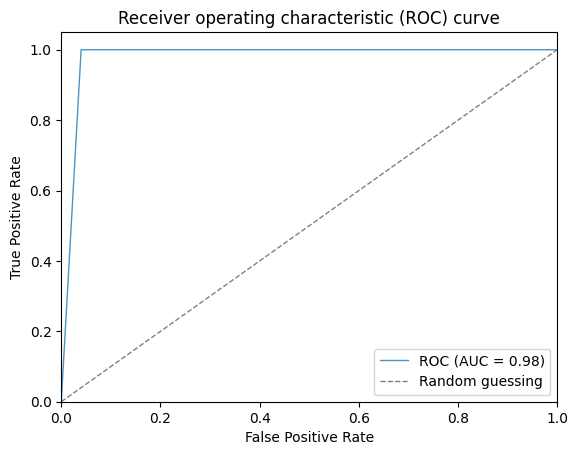

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(ytest, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()